# 1 Conceptual Questions

## Question 5

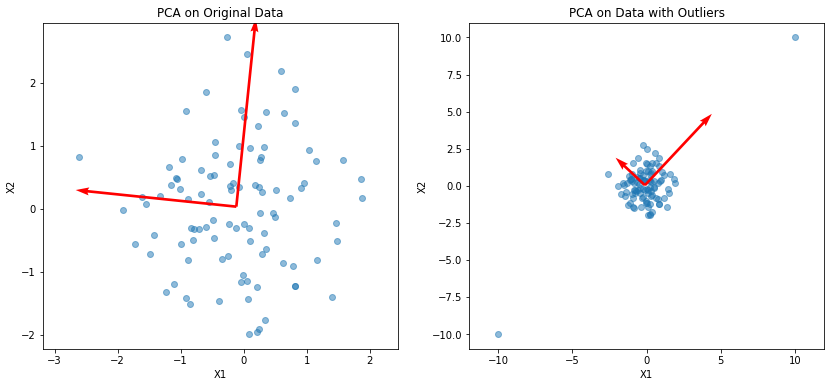

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic data
np.random.seed(42)
X = np.random.normal(loc=0, scale=1, size=(100, 2))

# Add outliers
X_outliers = np.vstack([X, np.array([[10, 10], [-10, -10]])])

# Perform PCA on the original data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform PCA on the data with outliers
pca_outliers = PCA(n_components=2)
X_pca_outliers = pca_outliers.fit_transform(X_outliers)

# Plot original data and principal components
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(pca.mean_[0], pca.mean_[1], v[0], v[1],
               angles='xy', scale_units='xy', scale=1, color='r')
plt.title("PCA on Original Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')

# Plot data with outliers and principal components
plt.subplot(1, 2, 2)
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], alpha=0.5)
for length, vector in zip(pca_outliers.explained_variance_, pca_outliers.components_):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(pca_outliers.mean_[0], pca_outliers.mean_[1], v[0], v[1],
               angles='xy', scale_units='xy', scale=1, color='r')
plt.title("PCA on Data with Outliers")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')

plt.show()


---

# 2 PCA: FOOD CONSUMPTION IN EUROPEAN COUNTRIES

## Part (a)

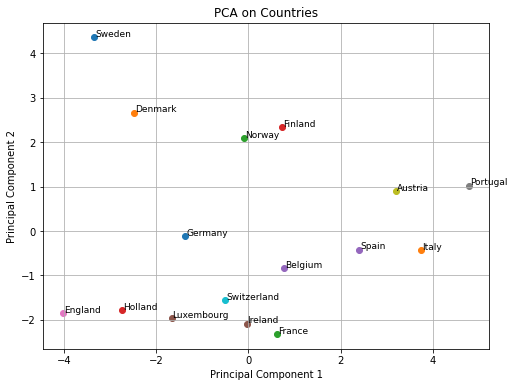

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('food-consumption.csv')

# Extract country names
countries = data['Country']
data = data.drop('Country', axis=1)

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Perform PCA on countries
pca_countries = PCA(n_components=2)
principal_components_countries = pca_countries.fit_transform(data_standardized)

# Plot PCA results for countries
plt.figure(figsize=(8, 6))
for i, country in enumerate(countries):
    plt.scatter(principal_components_countries[i, 0], principal_components_countries[i, 1])
    plt.text(principal_components_countries[i, 0] + 0.02, principal_components_countries[i, 1] + 0.02, country, fontsize=9)
plt.title('PCA on Countries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


## Part (b)

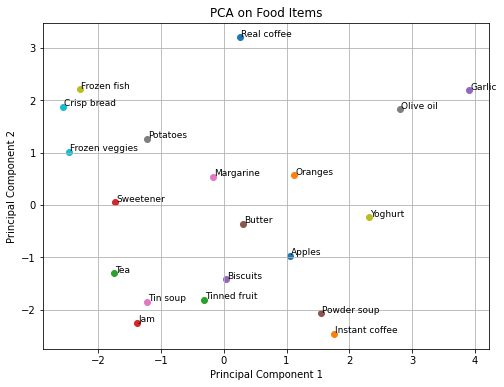

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('food-consumption.csv')

# Extract country names
countries = data['Country']
data = data.drop('Country', axis=1)

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Transpose the data for food items PCA
data_transposed = data_standardized.T

# Perform PCA on food items
pca_food_items = PCA(n_components=2)
principal_components_food_items = pca_food_items.fit_transform(data_transposed)

# Plot PCA results for food items
plt.figure(figsize=(8, 6))
food_items = data.columns
for i, food_item in enumerate(food_items):
    plt.scatter(principal_components_food_items[i, 0], principal_components_food_items[i, 1])
    plt.text(principal_components_food_items[i, 0] + 0.02, principal_components_food_items[i, 1] + 0.02, food_item, fontsize=9)
plt.title('PCA on Food Items')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


---

# 3 Order of faces using ISOMAP

## (a) Visualise the nearest neighbour graph

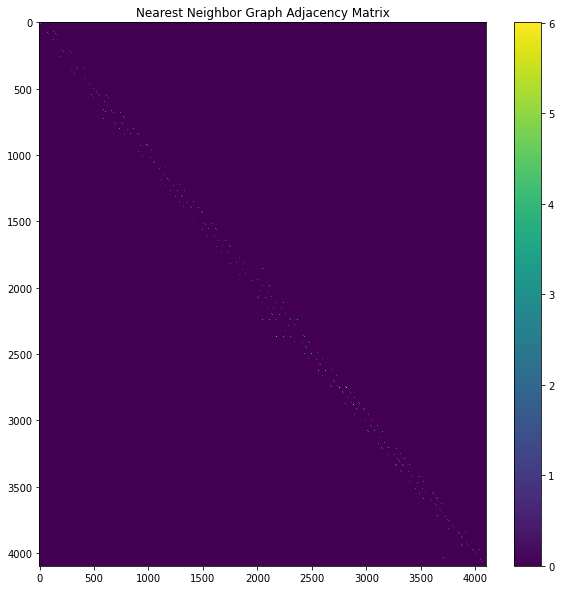

In [7]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load the dataset
data = sio.loadmat('isomap.mat')['images']  # Ensure 'isomap.mat' is in the same directory

# Reshape data
n_samples = data.shape[0]
data = data.reshape(n_samples, -1)

# Compute the nearest neighbor graph
nbrs = NearestNeighbors(n_neighbors=6).fit(data)
distances, indices = nbrs.kneighbors(data)

# Construct adjacency matrix
adjacency_matrix = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in indices[i]:
        adjacency_matrix[i, j] = distances[i, np.where(indices[i] == j)]

# Visualize the adjacency matrix with enhanced color map
plt.figure(figsize=(10, 10))
plt.imshow(adjacency_matrix, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.title('Nearest Neighbor Graph Adjacency Matrix')
plt.show()


## (b) Implement the ISOMAP algorithm and obtain a 2D embedding

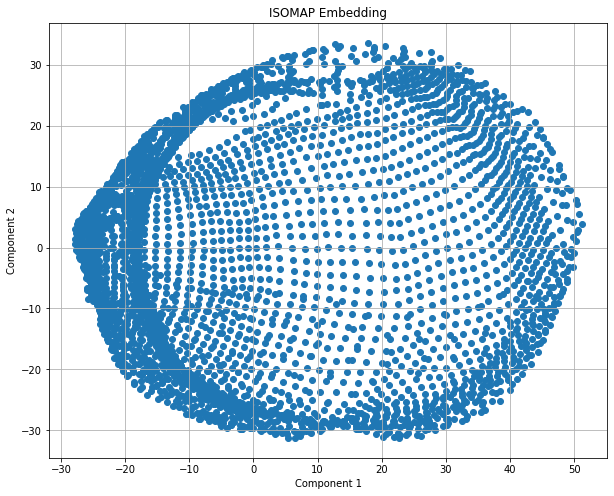

In [8]:
from sklearn.manifold import Isomap

# Perform ISOMAP
isomap = Isomap(n_neighbors=6, n_components=2)
embedding = isomap.fit_transform(data)

# Plot the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('ISOMAP Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


## (c) Perform PCA on the images

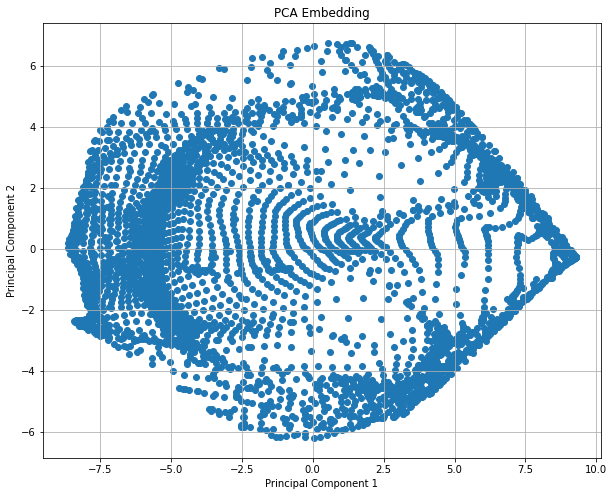

In [9]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(data)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1])
plt.title('PCA Embedding')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


---

# 4 Density estimation: Psychological experiments.

## Part (a) - Code for 1D Histograms and KDEs

   amygdala     acc  orientation
0    0.0051 -0.0286            2
1   -0.0674  0.0007            3
2   -0.0257 -0.0110            3
3    0.0504 -0.0167            2
4    0.0125 -0.0005            5


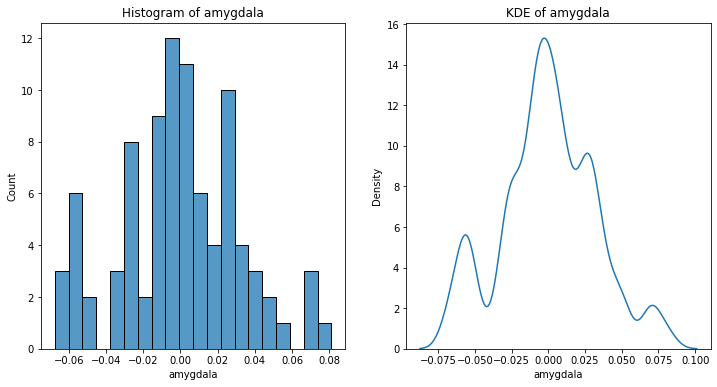

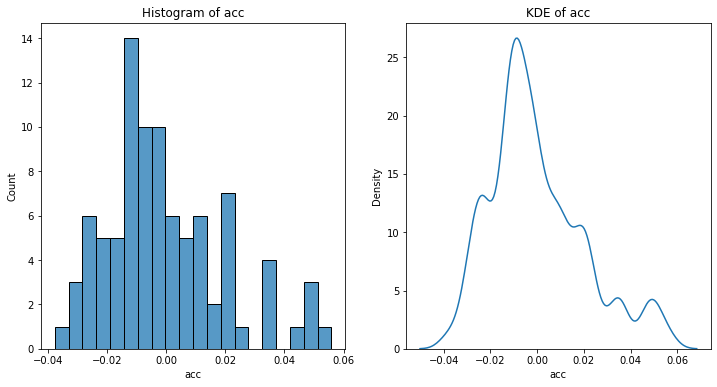

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('n90pol.csv')  # Update with the correct path

# Display the first few rows of the dataframe
print(data.head())

# Function to plot 1D Histogram and KDE
def plot_1d_histogram_kde(column):
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], bins=20, kde=False)
    plt.title(f'Histogram of {column}')

    # KDE
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[column], bw_adjust=0.5)
    plt.title(f'KDE of {column}')

    plt.show()

# Plotting for amygdala and acc
plot_1d_histogram_kde('amygdala')
plot_1d_histogram_kde('acc')


## Part (b) - Code for 2D Histogram


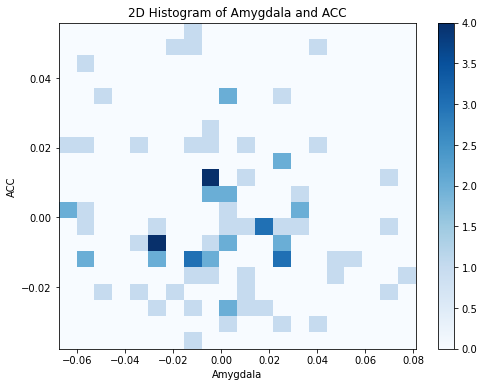

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('n90pol.csv')  # Update with the correct path

# Plot 2D Histogram for the pair (amygdala, acc)
plt.figure(figsize=(8, 6))
plt.hist2d(data['amygdala'], data['acc'], bins=20, cmap='Blues')
plt.colorbar()
plt.xlabel('Amygdala')
plt.ylabel('ACC')
plt.title('2D Histogram of Amygdala and ACC')
plt.show()


## Part (c) - Code for 2D KDE


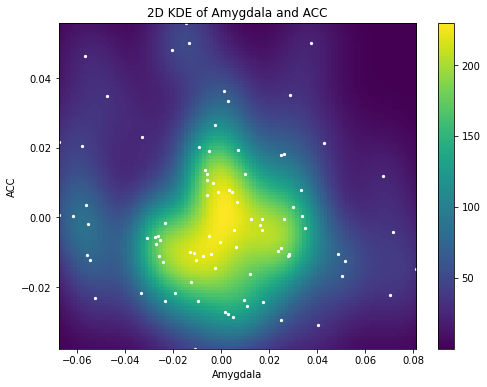

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np

# Load the dataset
data = pd.read_csv('n90pol.csv')  # Update with the correct path

# Function to plot 2D KDE
def plot_2d_kde(x, y, bandwidth=0.01):
    # Perform kernel density estimation
    X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
    xy_sample = np.vstack([X.ravel(), Y.ravel()]).T
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(np.vstack([x, y]).T)
    Z = np.exp(kde.score_samples(xy_sample)).reshape(X.shape)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.imshow(Z, origin='lower', aspect='auto', extent=[x.min(), x.max(), y.min(), y.max()])
    plt.colorbar()
    plt.scatter(x, y, s=5, facecolor='white')
    plt.xlabel('Amygdala')
    plt.ylabel('ACC')
    plt.title('2D KDE of Amygdala and ACC')
    plt.show()

# Plotting 2D KDE
plot_2d_kde(data['amygdala'], data['acc'])


## Part (d) - Code for Conditional Distributions and Sample Means


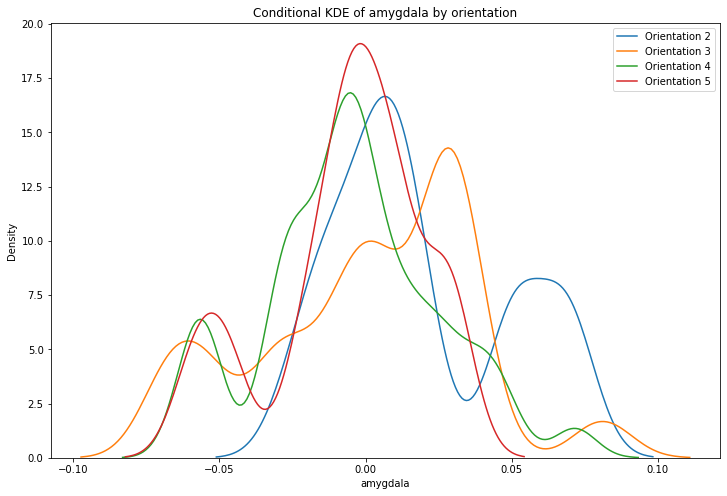

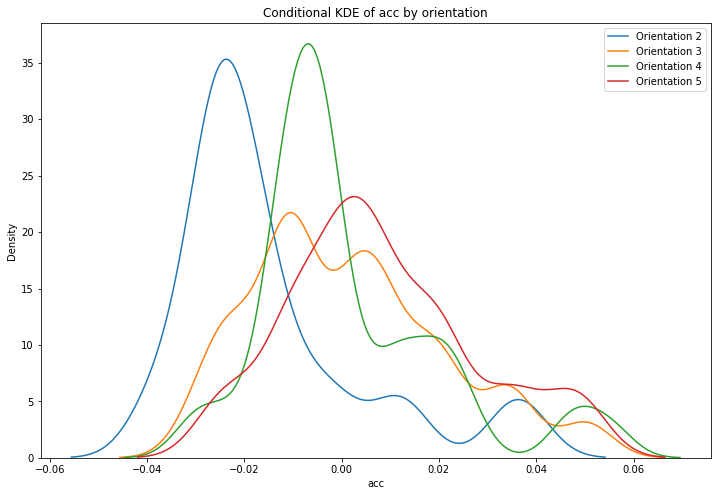

             amygdala       acc
orientation                    
2            0.019062 -0.014769
3            0.000588  0.001671
4           -0.004720  0.001310
5           -0.005692  0.008142


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('n90pol.csv')  # Update with the correct path

# Function to plot conditional KDEs
def plot_conditional_kde(column, condition):
    orientations = sorted(data[condition].unique())
    plt.figure(figsize=(12, 8))
    for c in orientations:
        subset = data[data[condition] == c]
        sns.kdeplot(subset[column], bw_adjust=0.5, label=f'Orientation {c}')
    plt.title(f'Conditional KDE of {column} by {condition}')
    plt.legend()
    plt.show()

# Plotting conditional KDEs for amygdala and acc based on orientation
plot_conditional_kde('amygdala', 'orientation')
plot_conditional_kde('acc', 'orientation')

# Function to calculate conditional sample means
def calculate_conditional_means(data, columns, condition):
    means = data.groupby(condition)[columns].mean()
    return means

# Calculate conditional sample means for amygdala and acc based on orientation
conditional_means = calculate_conditional_means(data, ['amygdala', 'acc'], 'orientation')
print(conditional_means)


## Part (e) - Code for Conditional 2D KDE


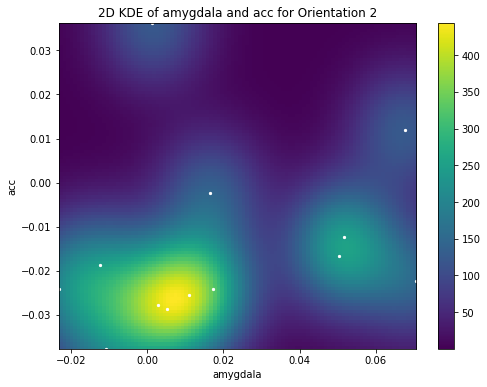

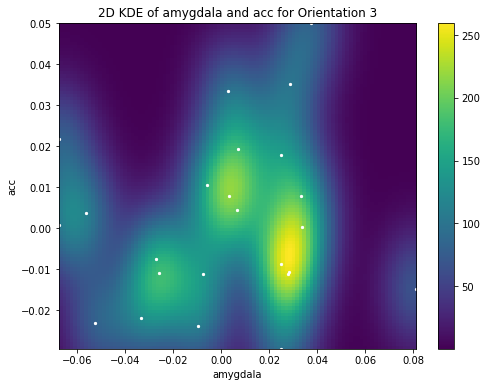

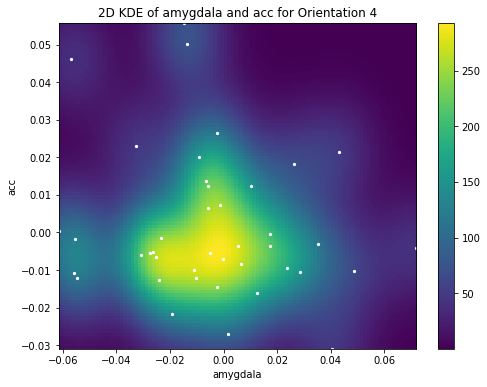

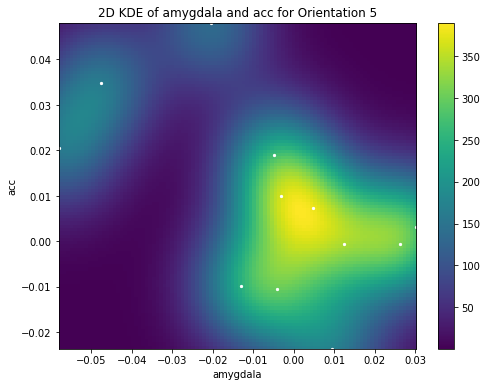

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np

# Load the dataset
data = pd.read_csv('n90pol.csv')  # Update with the correct path

# Function to plot 2D KDE for conditional distributions
def plot_conditional_2d_kde(x, y, condition, bandwidth=0.01):
    orientations = sorted(data[condition].unique())
    for c in orientations:
        subset = data[data[condition] == c]
        X, Y = np.meshgrid(np.linspace(subset[x].min(), subset[x].max(), 100),
                           np.linspace(subset[y].min(), subset[y].max(), 100))
        xy_sample = np.vstack([X.ravel(), Y.ravel()]).T
        kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
        kde.fit(np.vstack([subset[x], subset[y]]).T)
        Z = np.exp(kde.score_samples(xy_sample)).reshape(X.shape)

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.imshow(Z, origin='lower', aspect='auto', extent=[subset[x].min(), subset[x].max(), subset[y].min(), subset[y].max()], cmap='viridis')
        plt.colorbar()
        plt.scatter(subset[x], subset[y], s=5, facecolor='white')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'2D KDE of {x} and {y} for Orientation {c}')
        plt.show()

# Plotting 2D KDE for conditional distributions of amygdala and acc based on orientation
plot_conditional_2d_kde('amygdala', 'acc', 'orientation')


---

# 5 EIGENFACES AND SIMPLE FACE RECOGNITION

## Part (a) Performing PCA and Obtaining Eigenfaces

In [15]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set the directory
dir_path = 'yalefaces'

# Function to load and preprocess images
def load_and_preprocess_images(subject, exclude_test=False):
    images = []
    for filename in os.listdir(dir_path):
        if filename.startswith(subject):
            if exclude_test and 'test' in filename:
                continue
            img_path = os.path.join(dir_path, filename)
            img = Image.open(img_path).convert('L')  # convert to grayscale
            img = img.resize((4, 4))  # resize to 4x4
            img_data = np.array(img).flatten()  # flatten the image
            images.append(img_data)
    return np.array(images)

# Load images for both subjects
images_subject1 = load_and_preprocess_images('subject01', exclude_test=True)
images_subject2 = load_and_preprocess_images('subject02', exclude_test=True)

# Stack all images together for PCA
all_images = np.vstack((images_subject1, images_subject2))


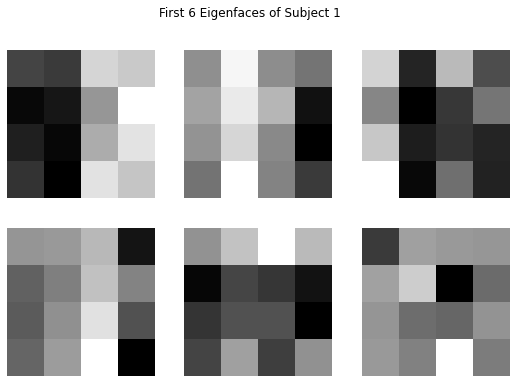

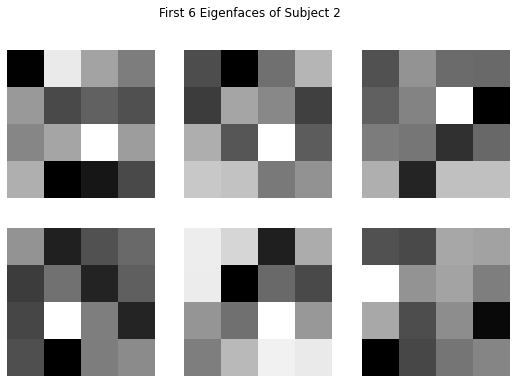

In [16]:
# Perform PCA with a sufficient number of components
n_components = 12  # We will extract 12 components to cover both subjects
pca = PCA(n_components=n_components)
pca.fit(all_images)

# Calculate the number of eigenfaces for each subject based on the number of components
num_eigenfaces_per_subject = n_components // 2

# Get the eigenfaces for each subject
eigenfaces_subject1 = pca.transform(images_subject1)
eigenfaces_subject2 = pca.transform(images_subject2)

# Ensure we have the correct number of components for plotting
def plot_eigenfaces(eigenfaces, title, num_faces):
    fig, axes = plt.subplots(2, 3, figsize=(9, 6))
    for i, ax in enumerate(axes.flatten()):
        if i < num_faces:
            ax.imshow(eigenfaces[i].reshape(4, 4), cmap='gray')
        else:
            ax.axis('off')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

plot_eigenfaces(pca.components_[:num_eigenfaces_per_subject], 'First 6 Eigenfaces of Subject 1', num_faces=6)
plot_eigenfaces(pca.components_[num_eigenfaces_per_subject:num_eigenfaces_per_subject + 6], 'First 6 Eigenfaces of Subject 2', num_faces=6)


Code Second Version HIGHER RESOLUTION

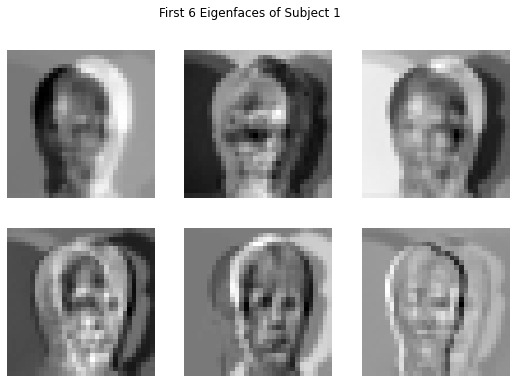

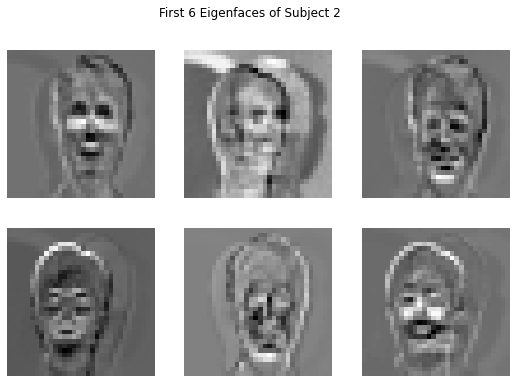

In [17]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set the directory
dir_path = 'yalefaces'

# Function to load and preprocess images
def load_and_preprocess_images(subject, exclude_test=False, image_size=(32, 32)):
    images = []
    for filename in os.listdir(dir_path):
        if filename.startswith(subject):
            if exclude_test and 'test' in filename:
                continue
            img_path = os.path.join(dir_path, filename)
            img = Image.open(img_path).convert('L')  # convert to grayscale
            img = img.resize(image_size)  # resize to desired size
            img_data = np.array(img).flatten()  # flatten the image
            images.append(img_data)
    return np.array(images)

# Load images for both subjects
images_subject1 = load_and_preprocess_images('subject01', exclude_test=True)
images_subject2 = load_and_preprocess_images('subject02', exclude_test=True)

# Stack all images together for PCA
all_images = np.vstack((images_subject1, images_subject2))
# Perform PCA with a sufficient number of components
n_components = 12  # We will extract 12 components to cover both subjects
pca = PCA(n_components=n_components)
pca.fit(all_images)

# Calculate the number of eigenfaces for each subject based on the number of components
num_eigenfaces_per_subject = n_components // 2

# Ensure we have the correct number of components for plotting
def plot_eigenfaces(eigenfaces, title, image_size=(32, 32)):
    fig, axes = plt.subplots(2, 3, figsize=(9, 6))
    for i, ax in enumerate(axes.flatten()):
        if i < len(eigenfaces):
            ax.imshow(eigenfaces[i].reshape(image_size), cmap='gray')
        else:
            ax.axis('off')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Get the eigenfaces for each subject
eigenfaces_subject1 = pca.transform(images_subject1)
eigenfaces_subject2 = pca.transform(images_subject2)

plot_eigenfaces(pca.components_[:num_eigenfaces_per_subject], 'First 6 Eigenfaces of Subject 1', image_size=(32, 32))
plot_eigenfaces(pca.components_[num_eigenfaces_per_subject:num_eigenfaces_per_subject + 6], 'First 6 Eigenfaces of Subject 2', image_size=(32, 32))


## Part (b): Simple Face Recognition Task

In [18]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set the directory
dir_path = 'yalefaces'

# Function to load and preprocess images
def load_and_preprocess_images(subject, exclude_test=False):
    images = []
    for filename in os.listdir(dir_path):
        if filename.startswith(subject):
            if exclude_test and 'test' in filename:
                continue
            img_path = os.path.join(dir_path, filename)
            img = Image.open(img_path).convert('L')  # convert to grayscale
            img = img.resize((16, 16))  # resize to 16x16
            img_data = np.array(img).flatten()  # flatten the image
            images.append(img_data)
    return np.array(images)

# Load images for both subjects, excluding test images
images_subject1 = load_and_preprocess_images('subject01', exclude_test=True)
images_subject2 = load_and_preprocess_images('subject02', exclude_test=True)

# Perform PCA with a sufficient number of components
n_components = 6  # Extracting 6 components for each subject
pca1 = PCA(n_components=n_components)
pca2 = PCA(n_components=n_components)
pca1.fit(images_subject1)
pca2.fit(images_subject2)

# Load test images
test_image_subject1 = Image.open(os.path.join(dir_path, 'subject01-test.gif')).convert('L').resize((16, 16))
test_image_subject2 = Image.open(os.path.join(dir_path, 'subject02-test.gif')).convert('L').resize((16, 16))
test_image_subject1 = np.array(test_image_subject1).flatten()
test_image_subject2 = np.array(test_image_subject2).flatten()

# Project the test images onto the eigenfaces
projection_subject1 = pca1.transform([test_image_subject1])
projection_subject2 = pca2.transform([test_image_subject2])

# Calculate the projection residuals
residuals = []
for i, (test_image, test_projection) in enumerate([(test_image_subject1, projection_subject1), (test_image_subject2, projection_subject2)]):
    for j, pca in enumerate([pca1, pca2]):
        reconstructed = pca.inverse_transform(test_projection)
        residual = np.linalg.norm(test_image - reconstructed)
        residuals.append((i+1, j+1, residual))

# Print the results
for residual in residuals:
    print(f"s{residual[0]}{residual[1]}: {residual[2]}")

# Explain how to recognize the faces of the test images using the scores
print("\nTo recognize the faces of the test images, we compare the projection residuals. The test image is recognized as the subject with the smallest residual score. For example, if s11 is the smallest residual, then the test image belongs to Subject 1.")


s11: 430.8137097295051
s12: 1616.3951436099635
s21: 1450.8863474419816
s22: 215.27411137788334

To recognize the faces of the test images, we compare the projection residuals. The test image is recognized as the subject with the smallest residual score. For example, if s11 is the smallest residual, then the test image belongs to Subject 1.
